## 1. 데이터 불러오기

In [299]:
import numpy as np
import pandas as pd

In [300]:
data = pd.read_csv('train.csv')
data.tail(5)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


- id : 고유 id
- hour : 시간
- temperture : 1시간 전 기온
- precipitation : 1시간 전 비가 내리면 1, 내리지 않으면 0
- windspeed : 1시간 전 풍속(평균)
- humidity : 1시간 전 습도
- visibility : 1시간 전 시정/시계, 현재 기상 상황에서의 가시성
- ozone : 1시간 전 오존 농도
- pm10 : 1시간 전 미세먼지 농도
- pm2.5 : 1시간 전 초미세먼지 농도
- count : 시간에 따른 따릉이 대여 수 (target)

## 2. 데이터 확인하기

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [303]:
data.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [304]:
data['hour_bef_pm2.5'].groupby(data['hour']).mean().loc[2]

31.366666666666667

In [305]:
data.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


<AxesSubplot:xlabel='hour', ylabel='count'>

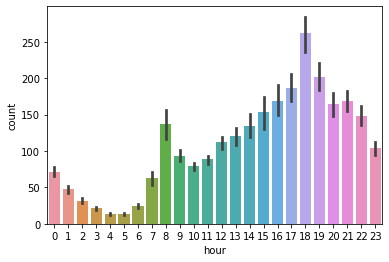

In [306]:
sns.barplot(x='hour', y='count', data=data)

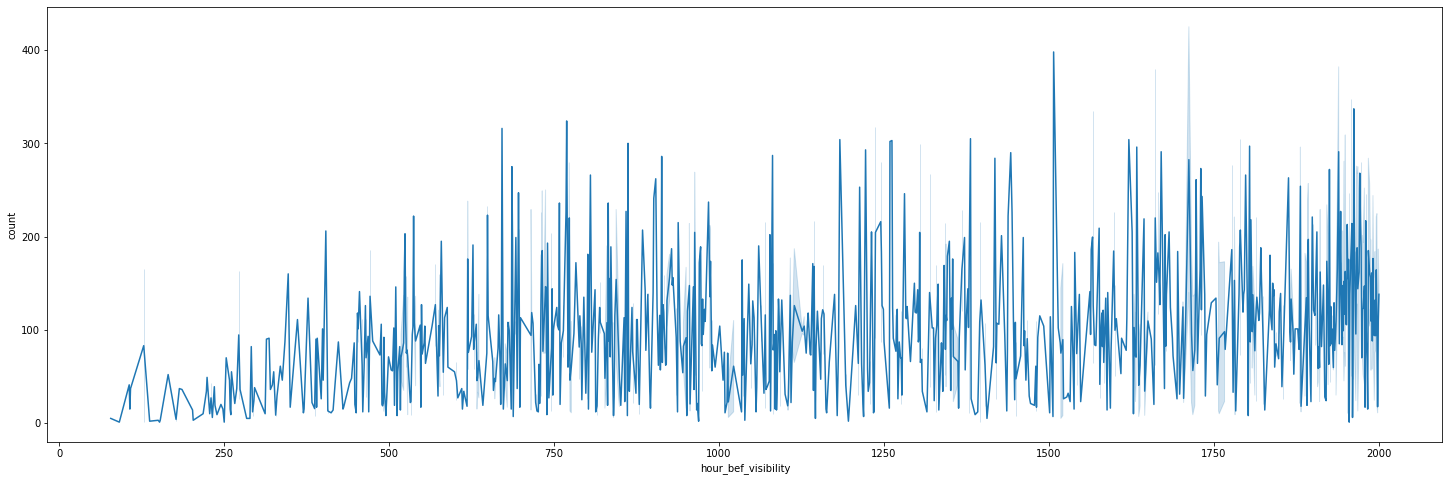

In [307]:
plt.figure(figsize=(25, 8))
sns.lineplot(x='hour_bef_visibility', y='count', data=data)
plt.show()

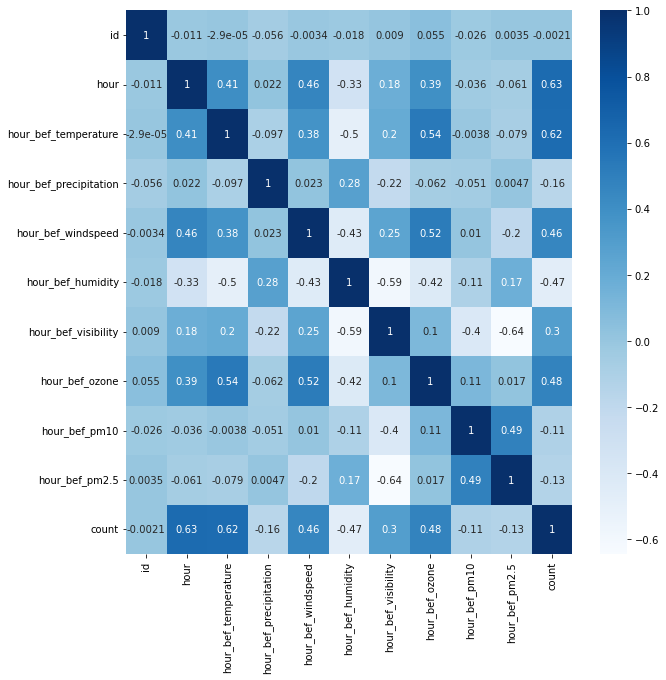

In [308]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap='Blues', annot=True)
plt.show()

In [309]:
data[['hour', 'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']].groupby('hour').mean()

,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
hour,,,
0,0.033763,55.881356,30.982759
1,NaN,NaN,NaN
2,0.030492,58.475410,31.366667
3,0.031213,59.180328,31.466667
4,0.031984,58.278689,32.116667
5,0.031623,56.721311,31.525424
6,0.029317,56.150000,31.603448
7,0.025300,56.533333,31.779661
8,0.021197,57.918033,31.796610


In [310]:
fill_func = lambda h: h.fillna(h.mean())
data = data.groupby('hour').apply(fill_func)

In [311]:
data['hour'].isna().unique()

array([False])

In [312]:
data['hour_bef_ozone']=data['hour_bef_ozone'].fillna((0.033763+0.030492)/2)
data['hour_bef_pm2.5']=data['hour_bef_pm2.5'].fillna((30.982759 + 31.366667) / 2)
data['hour_bef_pm10']=data['hour_bef_pm10'].fillna((55.881356+58.475410) / 2)

In [313]:
data.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

<AxesSubplot:>

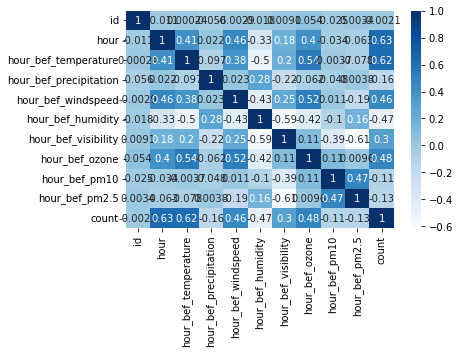

In [314]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

## 3. train / validation 나누기

In [445]:
col = ['hour','hour_bef_temperature', 'hour_bef_humidity']

In [446]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [447]:
# X = data.drop('count', axis=1)
X = data[col]
Y = data['count']

In [448]:
X.shape, Y.shape

((1459, 3), (1459,))

In [449]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size = 0.9, random_state=42)

In [450]:
x_train.shape, x_val.shape

((1313, 3), (146, 3))

In [451]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

## 4. 모델 학습하기

In [452]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [453]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)
lr_y_pred = lr.predict(x_val_scaled)
print('LinearRegression RMSE:', mean_squared_error(y_val, lr_y_pred) ** 0.5)
print('LinearRegression r2_score:', r2_score(y_val, lr_y_pred) ** 0.5)

LinearRegression RMSE: 56.0206996715505
LinearRegression r2_score: 0.772941770862234


In [456]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(x_train, y_train)
rf_y_pred = rf.predict(x_val)
print('RandomForest RMSE:', mean_squared_error(y_val, rf_y_pred) ** 0.5)
print('RandomForest r2_score:', r2_score(y_val, rf_y_pred) ** 0.5)

RandomForest RMSE: 47.73668120163067
RandomForest r2_score: 0.841244954797669


In [464]:
xg = XGBRegressor()
xg.fit(x_train, y_train)
xg_y_pred = xg.predict(x_val)
print('XGBoost RMSE:', mean_squared_error(y_val, xg_y_pred) ** 0.5)
print('XGBoost r2_score:', r2_score(y_val, xg_y_pred) ** 0.5)

XGBoost RMSE: 48.991298026370444
XGBoost r2_score: 0.8319412998435403


In [461]:
xg = XGBRegressor()
xg.fit(x_train_scaled, y_train)
xg_y_pred = xg.predict(x_val_scaled)
print('XGBoost RMSE:', mean_squared_error(y_val, xg_y_pred) ** 0.5)
print('XGBoost r2_score:', r2_score(y_val, xg_y_pred) ** 0.5)

XGBoost RMSE: 49.141491673674295
XGBoost r2_score: 0.8308042629077257


In [465]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, restore_best_weights=True)

In [470]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(Input(shape=(3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

In [471]:
model.fit(x_train_scaled, y_train, epochs=1000, verbose=1, callbacks=[es], validation_split=0.2)

Epoch 1/1000
33/33 [==============================] - 1s 16ms/step - loss: 16578.4629 - val_loss: 11657.1348
Epoch 2/1000
33/33 [==============================] - 0s 7ms/step - loss: 5599.5098 - val_loss: 4611.3105
Epoch 3/1000
33/33 [==============================] - 0s 7ms/step - loss: 3715.7874 - val_loss: 3455.9282
Epoch 4/1000
33/33 [==============================] - 0s 7ms/step - loss: 3093.0071 - val_loss: 3140.5859
Epoch 5/1000
33/33 [==============================] - 0s 7ms/step - loss: 2861.0100 - val_loss: 3115.3074
Epoch 6/1000
33/33 [==============================] - 0s 6ms/step - loss: 2827.1526 - val_loss: 3110.2717
Epoch 7/1000
33/33 [==============================] - 0s 7ms/step - loss: 2803.8208 - val_loss: 3083.9519
Epoch 8/1000
33/33 [==============================] - 0s 9ms/step - loss: 2816.3069 - val_loss: 3078.9021
Epoch 9/1000
33/33 [==============================] - 0s 6ms/step - loss: 2782.4761 - val_loss: 3069.8591
Epoch 10/1000
33/33 [======================

In [472]:
dl_y_pred = model.predict(x_val_scaled)
print('Deeplearnig RMSE:', mean_squared_error(y_val, dl_y_pred) ** 0.5)
print('Deeplearning r2_score:', r2_score(y_val, dl_y_pred) ** 0.5)

5/5 [==============================] - 0s 3ms/step
Deeplearnig RMSE: 55.447251023439115
Deeplearning r2_score: 0.7782276833330116


## 5. submission 만들기

In [330]:
test_data = pd.read_csv('test.csv')

In [331]:
fill_func = lambda h: h.fillna(h.mean())
test_data = test_data.groupby('hour').apply(fill_func)

In [332]:
test_data[['hour', 'hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']].groupby('hour').mean()

,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
hour,,,
0,0.029933,34.833333,23.200000
1,NaN,NaN,NaN
2,0.029400,35.033333,23.600000
3,0.031267,34.466667,24.366667
4,0.032833,33.800000,23.633333
5,0.032690,34.172414,24.310345
6,0.031633,34.666667,24.133333
7,0.028100,35.966667,24.933333
8,0.025800,35.533333,24.833333


In [333]:
test_data['hour_bef_ozone']=test_data['hour_bef_ozone'].fillna((0.029933+0.029400)/2)
test_data['hour_bef_pm10']=test_data['hour_bef_pm10'].fillna((34.833333 + 35.033333) / 2)
test_data['hour_bef_pm2.5']=test_data['hour_bef_pm2.5'].fillna((23.200000+23.600000) / 2)

In [334]:
result = xg.predict(test_data)

In [335]:
submission = pd.read_csv('submission.csv')
submission

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


In [336]:
submission['count'] = result
submission

,id,count
0,0,121.433929
1,1,191.850098
2,2,100.448868
3,4,42.848255
4,5,35.983692
...,...,...
710,2148,66.898109
711,2149,74.904160
712,2165,88.345734
713,2166,106.809227


In [338]:
submission.to_csv('result_xg.csv', index=False)